<a href="https://colab.research.google.com/github/caueraffaini/SIRmodel/blob/main/SIRmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

##Initial parameters

In [2]:
N = 350     # Total population
I0 = 1        # Initail number of infected individuals
R0 = 0        # Initail number of recovered individuals
beta = 0.4    #  Infectious rate
gamma = 0.05   # Recovery rate(1/average duration of infection in days)
tmax = 160     # Days to plot

t = np.linspace(0, tmax, tmax)
S0 = N - I0 - R0
y0 = S0, I0, R0

##The SIR model differential equations

In [3]:
def SIR(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N -gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

##Integrate the SIR equations

In [4]:
integral = odeint(SIR, y0, t, args=(beta, gamma, N))

##Plot

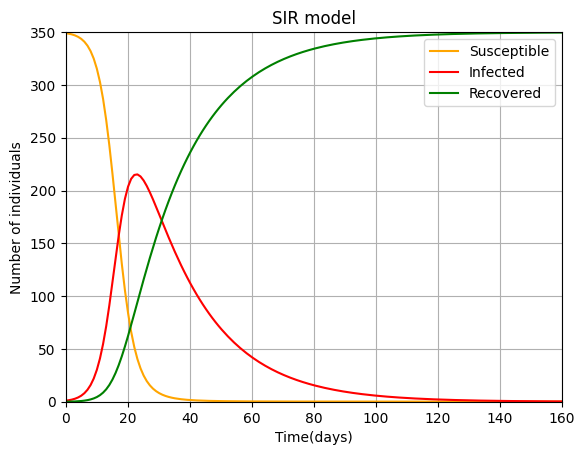

In [5]:
plt.figure()
plt.grid()
plt.title("SIR model")
plt.plot(t, integral[:, 0], 'orange', label='Susceptible')
plt.plot(t, integral[:, 1], 'r', label='Infected')
plt.plot(t, integral[:, 2], 'g', label='Recovered')
plt.xlabel('Time(days)')
plt.xlim([0,tmax])
plt.ylabel('Number of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();